 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [151]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [152]:
# Reading whale returns
whale_returns_path = Path("Resources\whale_returns.csv")
df_whale_returns = pd.read_csv(whale_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
df_whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [153]:
# Count nulls
df_whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [154]:
# Drop nulls
df_whale_returns.dropna(inplace=True)
df_whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [155]:
# Reading algorithmic returns
algo_returns_path = Path("Resources/algo_returns.csv")
df_algo_returns = pd.read_csv(algo_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
df_algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [156]:
# Count nulls
df_algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [157]:
# Drop nulls
df_algo_returns.dropna(inplace=True)
df_algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [158]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path("Resources\sp500_history.csv")
df_sp500_history = pd.read_csv(sp500_history_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
df_sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [159]:
# Check Data Types
df_sp500_history.dtypes

Close    object
dtype: object

In [160]:
# Fix Data Types

df_sp500_history["Close"]=df_sp500_history["Close"].str.replace("$","").astype(float)
df_sp500_history.dtypes

Close    float64
dtype: object

In [161]:
# Calculate Daily Returns
df_sp500_returns= df_sp500_history.pct_change()
df_sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [162]:
# Drop nulls
df_sp500_returns.dropna(inplace=True)
df_sp500_returns.isnull().sum()

Close    0
dtype: int64

In [163]:
# Rename `Close` Column to be specific to this portfolio.
df_sp500_returns.rename({"Close":"SP500"},axis="columns",inplace=True)
df_sp500_returns.head()

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [164]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df_combined = pd.concat([df_whale_returns, df_algo_returns, df_sp500_returns], axis="columns", join="inner")
df_combined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

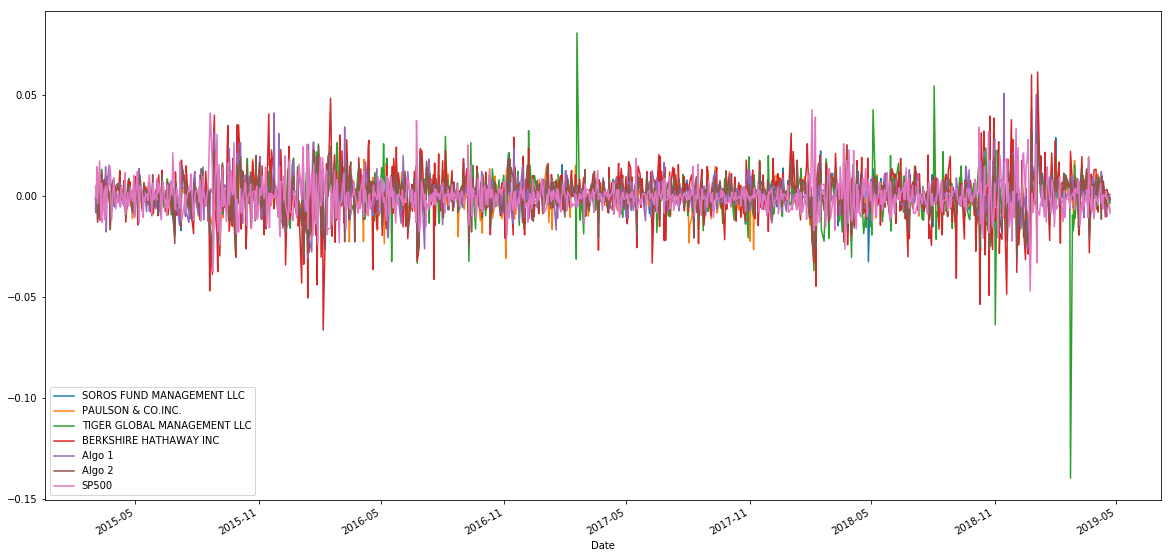

In [165]:
# Plot daily returns of all portfolios
df_combined.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

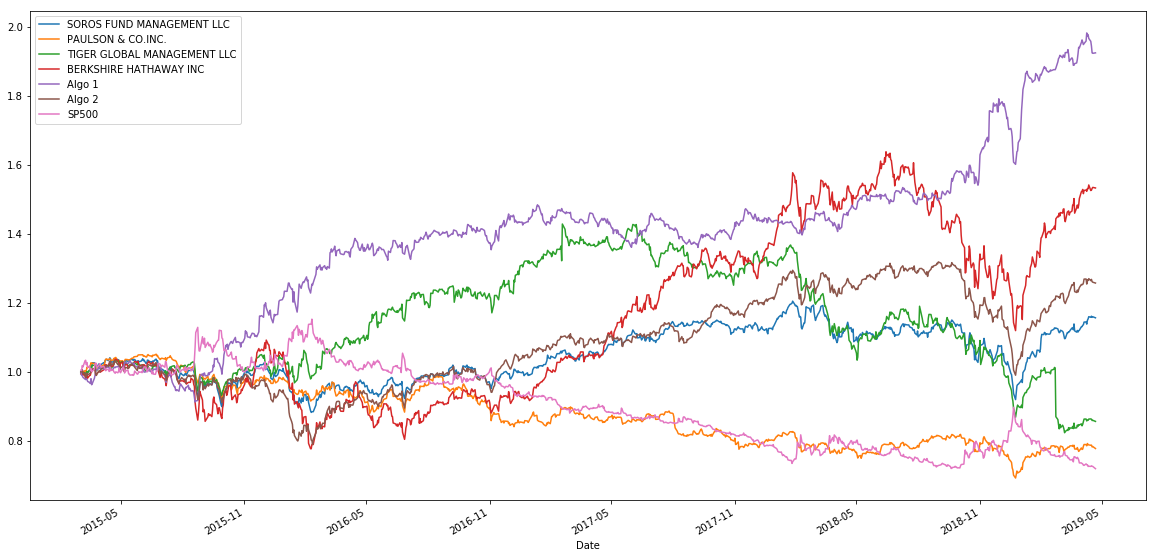

In [166]:
# Calculate cumulative returns of all portfolios
df_cum_returns = (df_combined+1).cumprod()

# Plot cumulative returns
df_cum_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


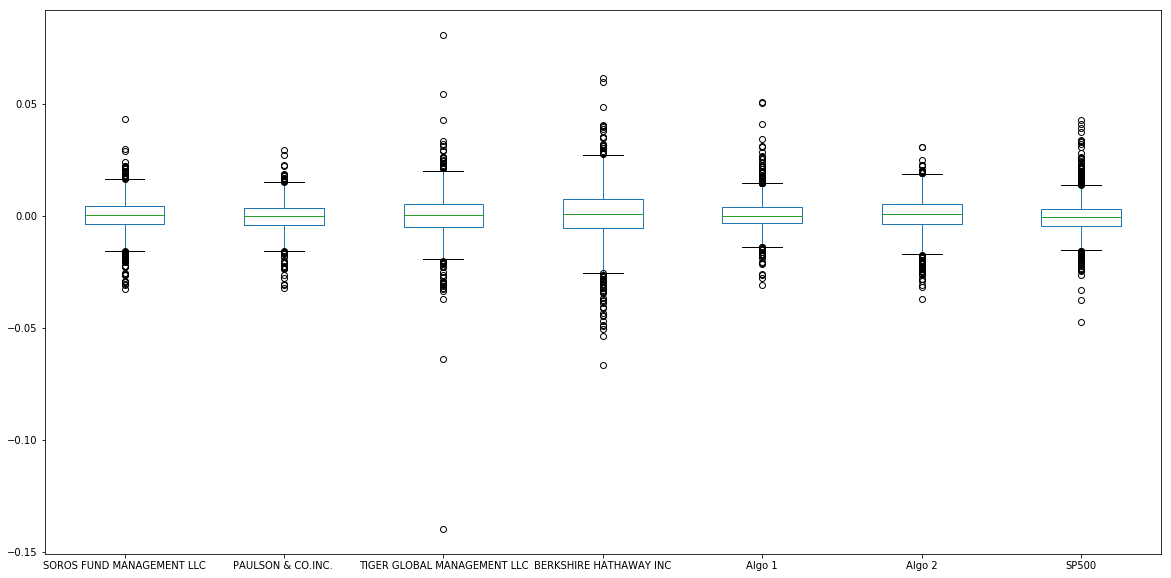

In [167]:
# Box plot to visually show risk
df_combined.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [168]:
# Calculate the daily standard deviations of all portfolios
df_combined_std = df_combined.std()
df_combined_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [169]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = df_sp500_returns.std()
# Determine which portfolios are riskier than the S&P 500
df_combined_std > df_combined_std[6]

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

### Calculate the Annualized Standard Deviation

In [170]:
# Calculate the annualized standard deviation (252 trading days)
df_combined_std*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500                          0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

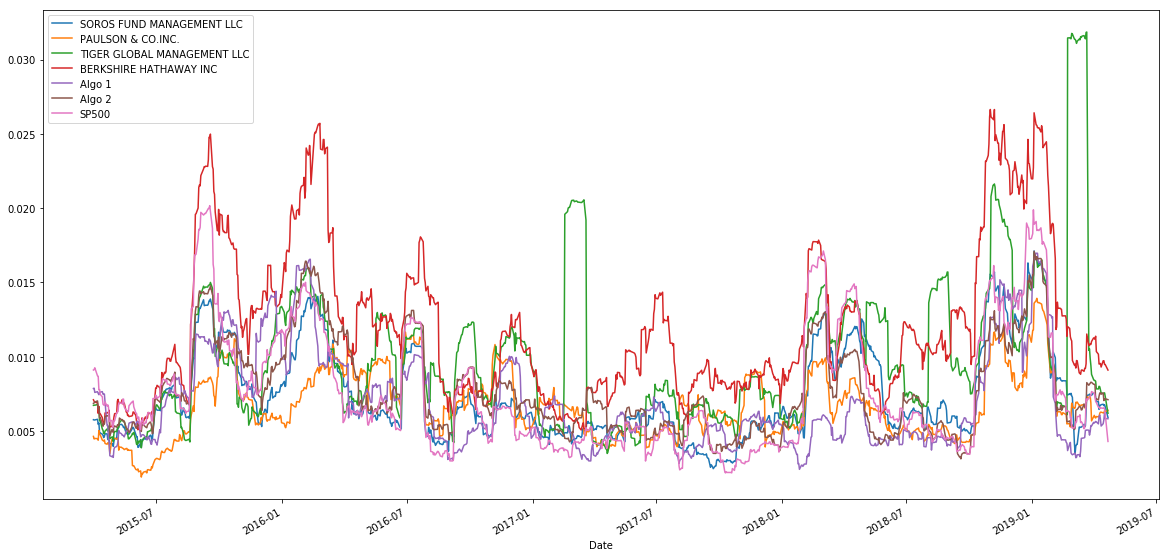

In [171]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_combined.rolling(window=21).std()

# Plot the rolling standard deviation
df_combined.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [172]:
# Calculate the correlation
df_combined.corr()
# Display de correlation matrix

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

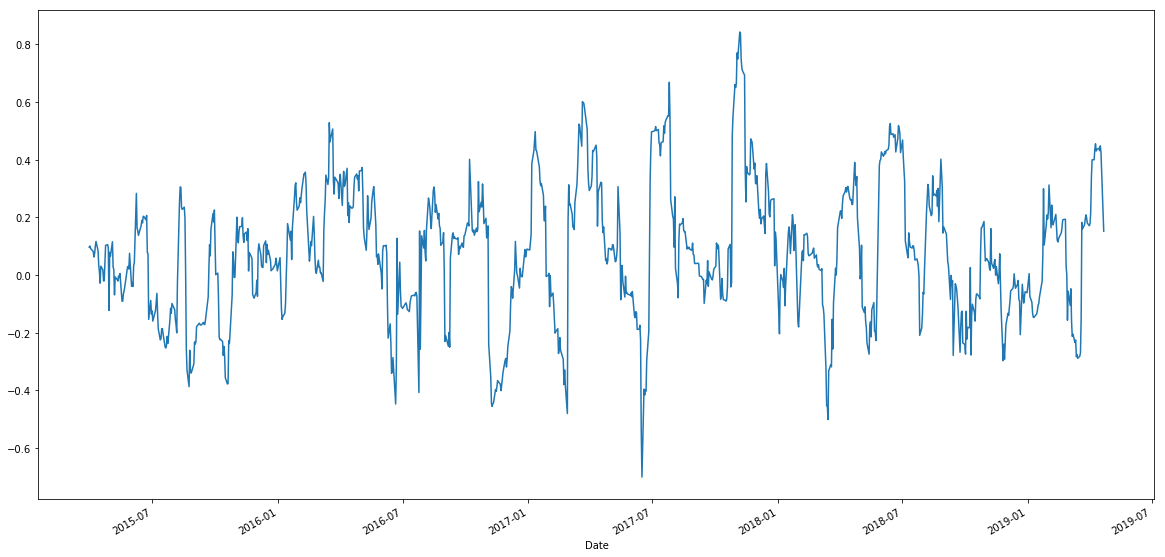

In [173]:
# Calculate covariance of a single portfolio
cov_soros = df_combined["SOROS FUND MANAGEMENT LLC"].rolling(window=21).cov(df_combined["SP500"])
# Calculate variance of S&P 500
var_sp500 = df_combined["SP500"].rolling(window=21).var()
# Computing beta
beta_soros = cov_soros / var_sp500
# Plot beta trend
beta_soros.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

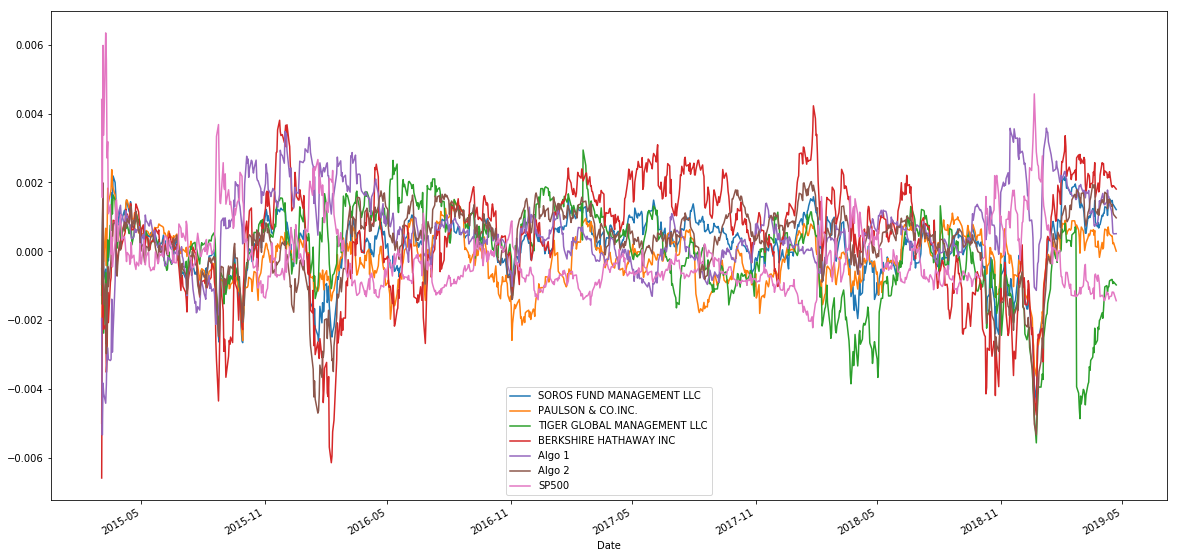

In [174]:
# Use `ewm` to calculate the rolling window
ewm = df_combined.ewm(halflife=21).mean().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [175]:
# Annualized Sharpe Ratios
df_sharpe = (df_combined.mean()*252)/(df_combined.std()*np.sqrt(252))

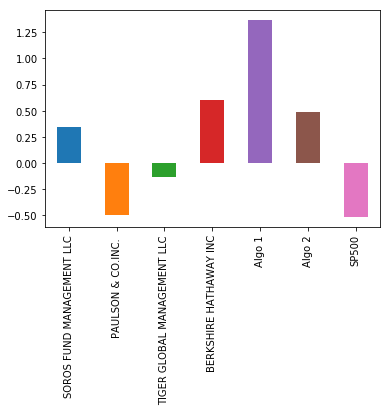

In [176]:
# Visualize the sharpe ratios as a bar plot
df_sharpe.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperforms S&P500 and whales portfolios because it has the highest sharpe ratio as well as highest cumulative returns.

Algo 2 outperforms S&P500 but underperform Bershire Hathaway because it has lower sharpe ratio given the risks and lower cumulative returns.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [187]:
# Reading data from 1st stock
aapl_path = Path("Resources/aapl_historical.csv")
df_aapl = pd.read_csv(aapl_path,index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
df_aapl.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [188]:
# Reading data from 2nd stock
cost_path = Path("Resources/cost_historical.csv")
df_cost = pd.read_csv(cost_path,index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
df_cost.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [189]:
# Reading data from 3rd stock
goog_path = Path("Resources/goog_historical.csv")
df_goog = pd.read_csv(goog_path,index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
df_goog.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [190]:
# Combine all stocks in a single DataFrame
df_portfolio = pd.concat([df_aapl,df_cost,df_goog], axis="index", join="inner")
df_portfolio.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [192]:
# Reset Date index
df_portfolio.reset_index(inplace=True)
df_portfolio.head()

,Trade DATE,Symbol,NOCP
0,2019-05-09,AAPL,200.72
1,2019-05-08,AAPL,202.90
2,2019-05-07,AAPL,202.86
3,2019-05-06,AAPL,208.48
4,2019-05-03,AAPL,211.75


In [193]:
# Reorganize portfolio data by having a column per symbol
df_pivot = df_portfolio.pivot_table(values="NOCP",index=["Trade DATE"],columns=["Symbol"])
df_pivot.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [194]:
# Calculate daily returns
df_returns = df_pivot.pct_change()
# Drop NAs
df_returns.dropna(inplace=True)
# Display sample data
df_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [195]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
df_weighted_returns = df_returns.dot(weights)
# Display sample data
df_weighted_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [198]:
# Join your returns DataFrame to the original returns DataFrame
df_weighted_returns = df_weighted_returns.reindex(df_weighted_returns.index.rename('Date'))
df_combined_new = pd.concat([df_combined,df_weighted_returns], axis="columns", join="outer")
df_combined_new.dropna(inplace=True)
df_combined_new.rename(columns={0:"my_port"},inplace=True)
df_combined_new.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,my_port
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061


In [199]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df_combined_new.dropna(inplace=True)
df_combined_new.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
my_port                        0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [201]:
# Calculate the annualized `std`
df_combined_new.std()

SOROS FUND MANAGEMENT LLC      0.009248
PAULSON & CO.INC.              0.007366
TIGER GLOBAL MANAGEMENT LLC    0.014671
BERKSHIRE HATHAWAY INC         0.015579
Algo 1                         0.008437
Algo 2                         0.008788
SP500                          0.009605
my_port                        0.013331
dtype: float64

### Calculate and plot rolling `std` with 21-day window

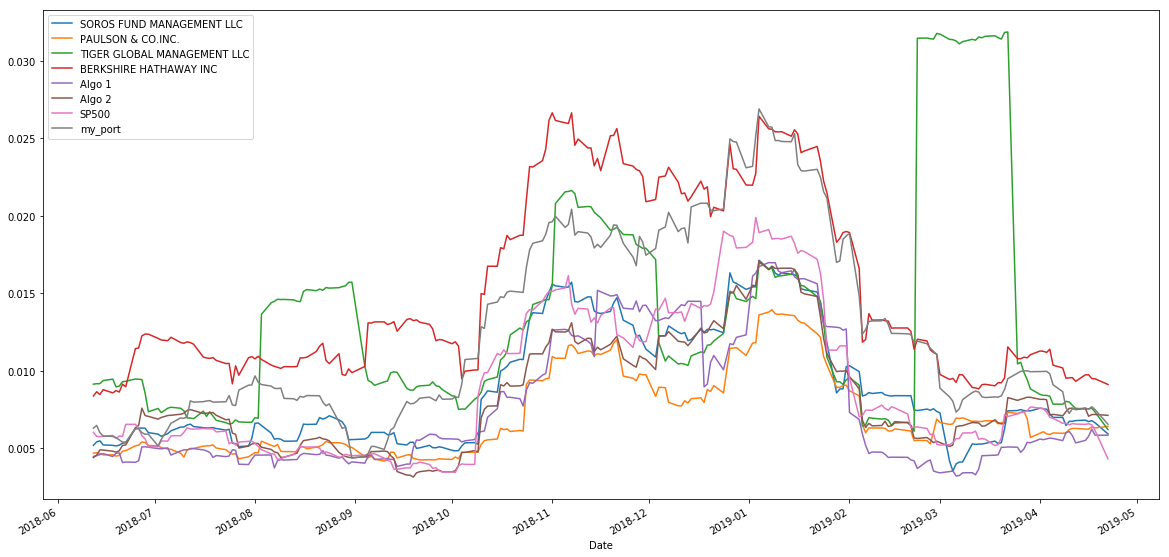

In [202]:
# Calculate rolling standard deviation
df_combined_new.rolling(window=21).std()

# Plot rolling standard deviation
df_combined_new.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [204]:
# Calculate and plot the correlation
df_combined_new.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,my_port
SOROS FUND MANAGEMENT LLC,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256,0.732548
PAULSON & CO.INC.,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862,0.643828
TIGER GLOBAL MANAGEMENT LLC,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881,0.390961
BERKSHIRE HATHAWAY INC,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832,0.800558
Algo 1,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478,0.260331
Algo 2,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540,0.739020
SP500,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000,0.005603
my_port,0.732548,0.643828,0.390961,0.800558,0.260331,0.739020,0.005603,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

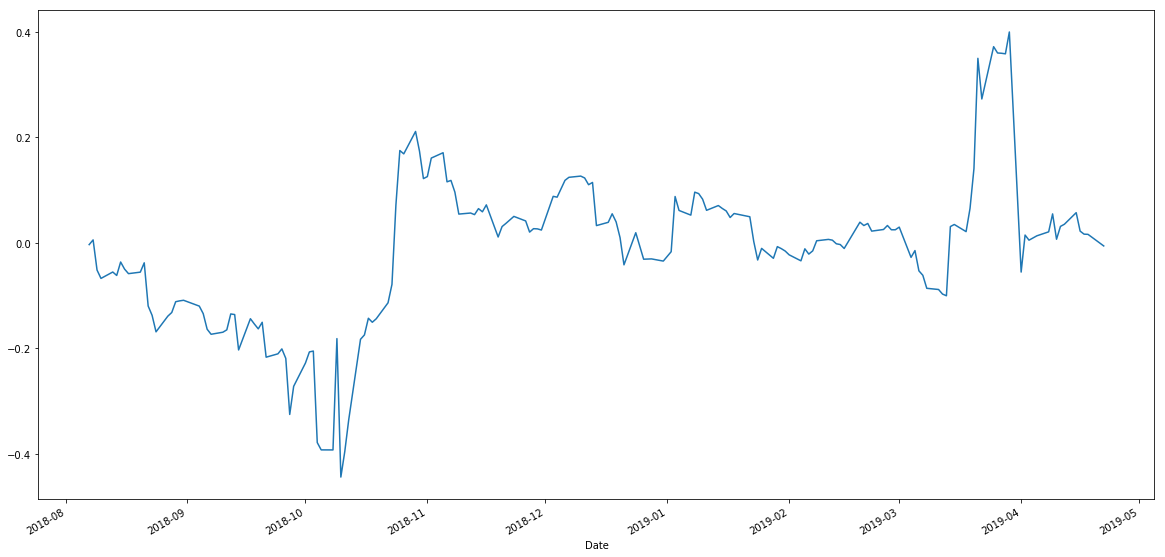

In [205]:
# Calculate and plot Beta
cov_my_port = df_combined_new["my_port"].rolling(window=60).cov(df_combined_new["SP500"])
var_sp500_new = df_combined_new["SP500"].rolling(window=60).var()
beta_my_port = cov_my_port / var_sp500_new
beta_my_port.plot(figsize=(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [206]:
# Calculate Annualzied Sharpe Ratios
df_sharpe_new = (df_combined_new.mean()*252)/(df_combined_new.std()*np.sqrt(252))

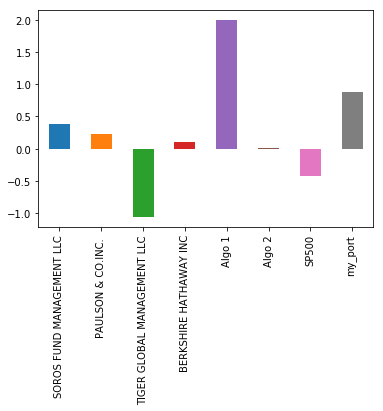

In [207]:
# Visualize the sharpe ratios as a bar plot
df_sharpe_new.plot.bar()

### How does your portfolio do?

Better than whales' and S&P 500 but not as good as Algo1